# Regression

회귀는 아래의 순서대로 학습한다. 
1. Univariate Linear Regression
2. Gradient Descent 
3. Multivariate Linear Regression
4. Polynomial Regression

## Univariate Linear Regression

회귀분석에서 주 목적은 변수들의 관계를 찾는데 있다. 일변량 선형 회귀분석은 하나의 독립변수(입력값)와 종속변수(출력값)의 관계를 찾는데 집중한다. 

다음과 같은 데이터 값들 $(x_i, y_i),~   i \in \{1..N\}$이 있다고 하자. (여기서 $x_i$ 가 독립변수, $y_i$ 가 종속변수이다.) 이와 같은 데이터 값들이 있을 때, 두 값들의 관계를 찾는 가장 간단한 모델은 두 변수가 선형의 관계가 있다고 가정하는 모델이다. 간단한 선형회귀 모델은 다음과 같다: 

$y_i = m x_i + n + \epsilon_i $

여기서 m은 지난 시간 introduction 에서 배운 기울기, n은 y절편, $\epsilon$ 은 오차 (또는 노이즈)이며, $m$과 $n$은 상수이다. 

그렇다면, 상수 $m$과 $n$은 어떻게 구할 수 있을까?  (의미 있는 것을 구해야 겠지요? ) 다음의 순서대로 따라서 공부해보자. 

- 의미있는 상수는 오차를 최소화하는 값이라고 할 수 있다. 
- 오차란 예측된 값($\hat{y}_i= m x_i + n$) 과 실측값($y_i$)의 차이라고 하자. 
- 계산 편의상 오차의 제곱의 합을 최소화 하는데 초점을 맞추자. (읽을 거리: root-mean square, Gaussian noise)

이제 아래의 수식을 최소화 해보자. 

\begin{align}
E(m,n) &= \sum \epsilon_i^2\\
        & = \sum (y_i - \hat{y}_i )^2 \\
       & = \sum (y_i - m x_i - n )^2
\end{align}

최소자승법(OLS)에 따라 위 수식을 최소화 하는 $m$과 $n$값은 $m$과 $n$에 대해 미분하여 그 값이 0이 되는 값임을 알고 있다. 위 함수를 각각 $m$과 $n$에 대해 편미분해보자.  

\begin{align}
\partial E(m,n) \over \partial m &= -2   \sum (y_i - m x_i - n )x_i\\
\partial E(m,n) \over \partial n & = -2  \sum (y_i - m x_i - n ) \\
\end{align}

위 두 식이 0이 되게 만드는 $m$과 $n$을 찾으면 된다. (참 간단하다...) 

먼저 n에 대하여 방정식을 풀면, 
- $n = \sum(y_i - m x_i) / N$ 또는 $\bar{y} - m\bar{x}$
- $m = {\sum (y_i - \bar{y} )(x_i - \bar{x}) \over \sum (x_i - \bar{x} )(x_i - \bar{x})} $ 또는 $Cov(x,y)\over Var(x)$


### 실습

자 그렇다면, 이제 지난 주에 배웠던 내용을 되살려보자. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("SalaryData.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [4]:
lin_reg = LinearRegression()

lin_reg.fit(np.array(df["YearsExperience"]).reshape(-1,1), np.array(df["Salary"]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

여기서 잠깐, reshape이 뭔가? 

In [5]:
np.array(df["YearsExperience"]).reshape(-1,1)

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9449.96232146]
Intercept:  25792.20019866871


자 그렇다면, 오늘 배운 내용을 바탕으로 직접 구해보자.

아래의 힌트를 사용하자. (시간을 절약하기위해...)

In [7]:
df['YearsExperience'].var()

8.053609195402299

In [8]:
df.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


## Gradient Descent

선형회귀에서 OLS가 불가능하거나, OLS의 연산의 실행속도가 느리다면, 다른 방법으로 독립변수와 종속변수의 관계를 찾아야 한다.

이때, 사용하는 것이 Gradient Descent 이며, Gradient Descent 의 알고리즘은 다음과 같다.

### Gradient Descent Updates

repeat until convergence: 
    $\theta_j := \theta_j - \alpha {\partial \over \partial \theta_j}  J(\theta_0, \theta_1)  $


여기서 J는 지난주 수식의 E(m,n)으로 생각하고, $\theta_1$ 와 $\theta_0$을 각각 $m$,$n$이라고 가정하자. 

또한 $\alpha$는 learning rate라고도 하며, 얼마나 모델을 빨리 학습하는지를 좌우 한다. 

이제 GD를 이용하여, 의미있는 m과 n을 구해보도록 하자. 

먼저 cost function J(또는 E)를 정의하자.

In [9]:
def compute_cost(n,m, points):
    total_cost = 0
    N = float(len(points))      # 왜 float로 casting 했는지 ? 
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y-(m*x+n))**2
        
    return total_cost/N    # 때에 따라 N은 없어도 됨.

다음으로 Gradient Descent 함수를 정의하자. 

In [10]:
def gradient_descent_runner(points, starting_m, starting_n, learning_rate, num_iterations):
    
    m = starting_m
    n = starting_n
    
    cost_graph = []
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(n,m,points))
        m,n = step_gradient(m,n, points, learning_rate)
        
    return [m,n,cost_graph]


def step_gradient(m_current, n_current, points, learning_rate):
    m_gradient = 0 
    n_gradient = 0 
    N = float(len(points))
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        m_gradient += -(2/N)*x*(y-(m_current*x + n_current))
        n_gradient += -(2/N)*(y-(m_current*x + n_current))
        
    m_updated = m_current - learning_rate * m_gradient 
    n_updated = n_current - learning_rate * n_gradient 
        
    return m_updated, n_updated
        

In [11]:
learning_rate = 0.01
initial_n = 10
initial_m = 10
num_iterations = 1000

points = np.array(df)
m, n , cost_graph = gradient_descent_runner(points, initial_m, initial_n, learning_rate, num_iterations)




In [12]:
n

25448.30186450865

In [13]:
m

9500.995394487247

In [14]:
cost_graph

[6491892001.066667,
 594623671.9306129,
 182970237.86586666,
 153352433.68934792,
 150348257.2462904,
 149205448.5546816,
 148200151.04344866,
 147212245.85999086,
 146233301.7339719,
 145262666.06525564,
 144300228.5259652,
 143345917.10076806,
 142399662.98563942,
 141461398.1387671,
 140531055.10544455,
 139608567.00136802,
 138693867.50700223,
 137786890.86275494,
 136887571.8642455,
 135995845.85761696,
 135111648.73488778,
 134234916.9293433,
 133365587.41096526,
 132503597.68190084,
 131648885.77196972,
 130801390.23420839,
 129961050.140453,
 129127805.07695895,
 128301595.14005786,
 127482360.93185058,
 126670043.55593728,
 125864584.61318311,
 125065926.1975198,
 124274010.89178294,
 123488781.76358333,
 122710182.36121511,
 121938156.7095967,
 121172649.30624638,
 120413605.11729282,
 119660969.57351804,
 118914688.56643443,
 118174708.444395,
 117440976.0087361,
 116713438.50995265,
 115992043.64390634,
 115276739.54806484,
 114567474.79777391,
 113864198.40255962,
 1131668

In [15]:
points[0,0]

1.1

In [16]:
len(points)

30

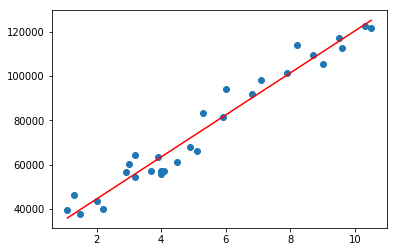

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
x = np.array(points[:,0])
y = np.array(points[:,1])
plt.scatter(x,y)
pred = m*x + n 
plt.plot(x,pred, c='r')
plt.show()

## HW1 Problem 1

아래와 같이 hyper parameter 와 initial point를 지정하여, GD를 통해 m과 n을 최적화 한다고 하자.

In [18]:
learning_rate = 0.01     # hyper parameter: alpha
num_iterations = 1000     # hyper parameter: number of steps 
initial_m = 10      # initial guess for m 
initial_n = 4000      # initial guess for n 

GD를 1000번 수행하며, m과 n이 중간에 생긴다. 
이 값들을 자 저장하여, 그래프를 1000번 그리면 너무 많으니, 0 번째, 100번째, 200번째.... 1000 번째 의 10개의 m과 n을 각각 구해 위와 같이 그래프로 그리시오. 



(조건: 그래프의 색깔은 0번째부터 10000번째로 상승하면서, 그래프의 색깔이 진하도록 조절하시오! ) 

## Multivariate Linear Regression

앞에서 우리는 일변량 선형회귀 문제를 해결하는 방법 2가지를 배웠다. 이번 section에서는 일변량 선형회귀를 더 일반화하여, 최적화 하는 것을 배운다. 

먼저 전에 있었던 식 
$y_i = m x_i + n + \epsilon_i $ 을 아래와 같이 바꾸자. 

$y_i = \sum_k \theta_k x_{k,i} + \theta_0 + \epsilon_i$

또는 간단히 아래와 같이 표현하자.  i 와 noise term 제거 

$y = \sum_k \theta_k x_{j} + \theta_0$

다른 표현 방법으로는 $h_θ(x)={θ}^T{x}=θ_0+θ_1x_1+θ_2x_2+⋯+θ_nx_n$

### cost function for multivariate linear regression

이제 최소화 할 cost function 을 다음과 같이 정의하자. (2로 나누는 이유는 2가 cancel out되어 계산이 용이하기 위함이다, 또는 normal gaussian 에서 온 것)

$J(θ)=J(θ_0,θ_1,…,θ_n) = {1 \over 2N} \sum_{i=1}^N \{h_θ(x^{(i)}) - y^{(i)}\}^2   $

그렇다면, 먼저 지난시간에 배운 GD를 이용하여 문제를 푼다고 하면 어떻게 할 수 있을까? 

(강의시간에 채워 넣으시오)

GD를 이용하면, 역시 이 문제도 쉽게 해결된다. parameter 값들이 더 늘어나는 차이점 밖에 없다. 

그렇다면, close-form 으로 위 parameter들 $\theta$식들을 update 할 수 는 없을까? 

다시 $h_\theta$ 함수를 관찰해보자. 그리고 y(i)값들을 벡터로 나열한다고 하자. y(i)값의 벡터 사이즈는 무엇일까? 

( y의 벡터 shape을 적으시오  )

$$  \begin{bmatrix} y^{(1)} \\ y^{(2)}  \\ \\ y^{N}  \end{bmatrix}  =  \begin{bmatrix} 1 & x_1^{(1)} &...&  x_K^{(1)} \\ 1 & ? & ... &  ? \\ \\ 1 & x_1^{(K)} &...&  ?  \end{bmatrix} \begin{bmatrix} \theta_0 \\ \theta_1  \\ \\ \theta_K \end{bmatrix} 
+  \begin{bmatrix} \epsilon^{(1)} \\ \epsilon^{(2)}  \\ \\ \epsilon^{?}  \end{bmatrix} $$ 

위 식을 아래와 같이 표현할 수 있다. (벡터, 행렬로...)

$Y = X \theta + \epsilon$

최소화 하고 싶은 값은 $\epsilon^T \epsilon$ 이다. (이게 의미 하는 게 무엇인가?)

즉, 우리가 최소화 하고자 하는 함수는 $(Y-X\theta)^T(Y-X\theta) $

이 식을 풀어보면, 다음과 같다. 

\begin{align}
\epsilon^T \epsilon &= (Y-X\theta)^T(Y-X\theta)  \\
        & = (Y^T-\theta^TX^T)(Y-X\theta) \\
       & =  Y^TY − \theta^TX^TY − Y^TX\theta + \theta^TX^TX\theta  \\
       & =  Y^TY − 2\theta^TX^TY + \theta^TX^TX\theta
\end{align}

위 식이 곧 모든 에러 값들의 합이 된다. 이제 위 식을 각각의 parameter에 편미분을 하면 된다.

${\partial \epsilon^T \epsilon \over \partial \theta} =  − 2X^TY + 2 X^TX\theta$

위 식이 0이 되는 $\theta$를 찾으면 다음과 같다.

$X^TX\theta = X^TY $

최적화된 parameter들은 다음과 같다

$\hat{\theta} = (X^TX)^{-1} X^TY $

## HW1 Problem 2

연봉 데이터를 이용하여, 앞에서 우리는 두가지 방법을 적용, 최적화된 파라미터들을 찾아 선형회귀를 성공적으로 수행하였다. 
그렇다면, 오늘 배운 Multivariate Linear Regression 으로도 문제를 풀 수 있을까? 

## Polynomial Regression

우리는 실제 다항식에 비례하는 데이터들을 주위에서 많이 보곤한다. 
다항식의 예: $y = ax^3 + bx^2 + cx +d$

문제를 단순하게 생각하면, 다항식의 다차 $x$값들은 $x_1$, $x_2$ ... 등에 대응만 시키면 된다. 

 $$ \begin{bmatrix} y_1\\ y_2\\ y_3 \\ \vdots \\ y_n \end{bmatrix}= \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^m \\ 1 & x_2 & x_2^2 & \dots & x_2^m \\ 1 & x_3 & x_3^2 & \dots & x_3^m \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^m \end{bmatrix} \begin{bmatrix} \theta_0\\ \theta_1\\ \theta_2\\ \vdots \\ \theta_m \end{bmatrix} + \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \varepsilon_3 \\ \vdots \\ \varepsilon_n \end{bmatrix} $$

여기서 아래첨자, 위첨자가 기존의 표현 방법에서 바뀌었음에 유의하자. (차원에 맞추다 보니...)

In [9]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [10]:
x

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [11]:
y

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

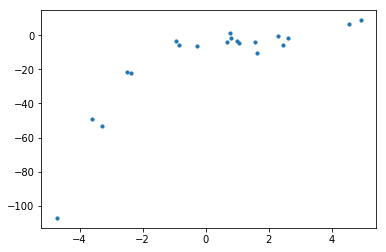

In [12]:
plt.scatter(x, y, s=10)

### HW1 Problem 3

위 식에서 볼 수 있듯이 최고차 항 3차 식에 맞게 가공의 데이터를 만들었다. 지금 배운 polynomial regression 을 이용하여 (최고차항이 3차임을 안다고 가정하고) 데이터 점들을 만든 원래의 식을 최대한 에러가 적게 찾아보자. scikit learn 등의 라이브러리 사용 금지! 